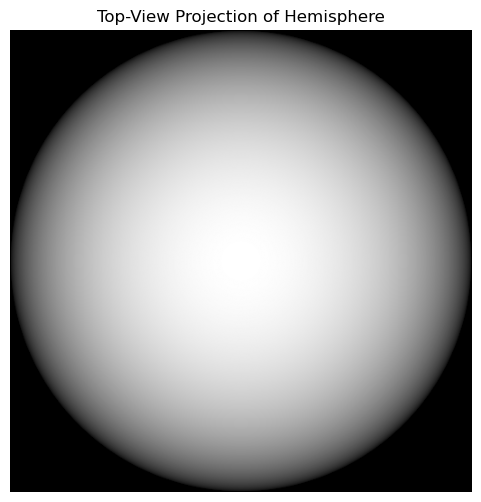

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
image_size = 512  # Width and height of the image
R = 1.0  # Radius of the hemisphere
alpha = 255  # Maximum intensity value (8-bit grayscale image)
I_max = alpha / R  # Modified intensity to remove geometric effects

# Create coordinate grid centered at (0,0)
x = np.linspace(-R, R, image_size)
y = np.linspace(-R, R, image_size)
X, Y = np.meshgrid(x, y)

# Convert to cylindrical coordinates
rho = np.sqrt(X**2 + Y**2)

# Compute z using the hemisphere equation (only valid for rho ≤ R)
valid_mask = rho <= R  # Mask to avoid complex numbers
Z = np.zeros_like(rho)  # Initialize Z with zeros
Z[valid_mask] = np.sqrt(R**2 - rho[valid_mask]**2)  # Solve for Z using hemisphere equation

# Compute intensity using the given formula I(ρ, ϕ, z) = I_max * z
intensity = I_max * Z

# Normalize for display (clip to range [0, 255])
intensity = np.clip(intensity, 0, 255)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(intensity, cmap='gray', extent=[-R, R, -R, R])
plt.axis('off')
plt.title('Top-View Projection of Hemisphere')
plt.show()

In [2]:
import numpy as np

# Compute the mean intensity of the top-view image, considering only the valid hemisphere region

# Mask for valid region (inside the circle of radius R)
valid_pixels = intensity[valid_mask]

# Compute the mean intensity
mean_intensity_top_view = np.mean(valid_pixels)

# Display the result
print("Mean Intensity of the Top-View Image:", mean_intensity_top_view)


Mean Intensity of the Top-View Image: 170.0581774491298


In [13]:
# Compute the mean intensity including the full square frame

# Total number of pixels in the square frame
total_pixels = image_size * image_size

# Mean intensity calculation including zero-intensity background
mean_intensity_with_frame = np.sum(valid_pixels) / total_pixels

# Display the result
print("Mean Intensity with Full Frame:", mean_intensity_with_frame)


Mean Intensity with Full Frame: 132.99547987060927


In [3]:
# Compute the mean intensity using np.mean(intensity), which includes the full image
mean_intensity_np_mean = np.mean(intensity)

# Display the result
print("Mean Intensity (using np.mean):", mean_intensity_np_mean)


Mean Intensity (using np.mean): 132.99547987060927


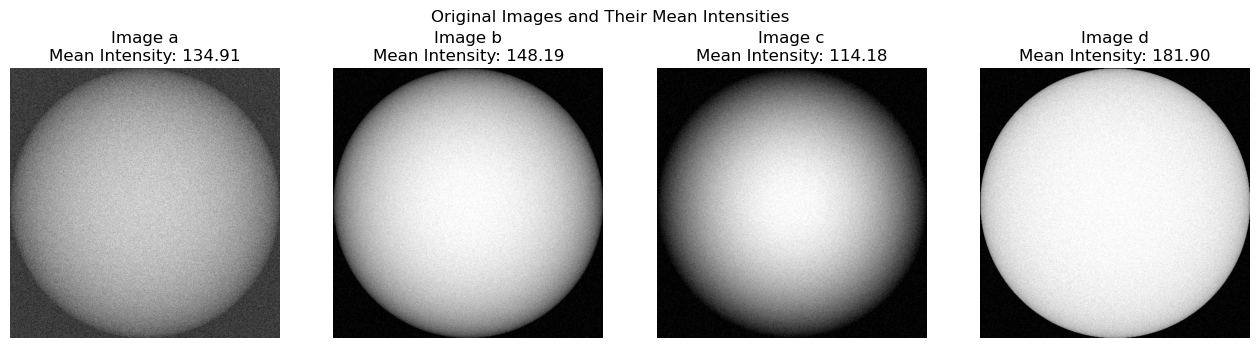

Mean Intensities of Original Images: {'a': 134.90629959106445, 'b': 148.1879768371582, 'c': 114.18183135986328, 'd': 181.89800262451172}


In [ ]:
import cv2
# 3. Pixel Intensity Calibration Issues

# Load images
image_paths = {
    "a": "/mnt/e/Term 4/HW/HW2/images/q3/a.png",
    "b": "/mnt/e/Term 4/HW/HW2/images/q3/b.png",
    "c": "/mnt/e/Term 4/HW/HW2/images/q3/c.png",
    "d": "/mnt/e/Term 4/HW/HW2/images/q3/d.png"
}
# Read images in grayscale
images = {name: cv2.imread(path, cv2.IMREAD_GRAYSCALE) for name, path in image_paths.items()}

# Compute mean intensity of original images
mean_intensities_original = {name: np.mean(img) for name, img in images.items()}

# Display original images and their mean intensities
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for ax, (name, img) in zip(axes, images.items()):
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Image {name}\nMean Intensity: {mean_intensities_original[name]:.2f}")
    ax.axis("off")

plt.suptitle("Original Images and Their Mean Intensities")
plt.show()

# Print mean intensity values
print("Mean Intensities of Original Images:", mean_intensities_original)